**HANDS-ON SESSION-II: DATA MINING TOOLS**



**Erdogan Kaya**

**CLASSIFICATION MODELS**

IMPORT THE NECESSARY LIBRARIES

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

IMPORT THE DATA USING PANDAS

In [24]:
bh_clf=pd.read_csv('/content/Boston-house-price-data.csv')
bh_clf

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


LOOK FOR MISSING VALUES

In [25]:
missing=bh_clf.isnull().sum()
missing

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


In [26]:
bh_clf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [27]:
# Classification models: First take the median of the house prices and categorize the price values into two values. For example,
#if the median house price is 4000, then all the values above and equal to 4000 will be one category and values below 4000 will be another category.
median_price = bh_clf['MEDV'].median()
bh_clf['classes'] = (bh_clf['MEDV'] >= median_price).astype(int)
bh_clf

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,classes
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0,1
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6,1
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4,1
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6,0
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9,1
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0,1


In [29]:
X = bh_clf.drop(['classes','MEDV'], axis=1)
y = bh_clf['classes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Apply the LOGISTIC REGRESSION MODEL to the training set and then make presictions using the test set.

Logistic regression is a statistical method used to predict binary outcomes (like "yes" or "no") by modeling the relationship between input features and the probability of a specific outcome. It uses a sigmoid function to ensure the output is between 0 and 1, representing the probability of belonging to a particular class.

In [30]:
# Initialize the Logistic Regression model
logistic_model = LogisticRegression(max_iter=100, random_state=42)

# Fit the model on the training data
logistic_model.fit(X_train, y_train)
# Predict on the testing set
y_pred = logistic_model.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Calculate the ACCURACY for the model. The accuracy is 82% which is a good thing which explains that the model is working good

**EVALUATE THE MODEL**: The classification_report function is used to get the four different and important metrics such as precision, recall, f1-score and support.


**Precision**: Measures how many of the positive predictions made by the model are actually correct. It’s about accuracy of positive results.

**Recall**: Measures how many of the actual positive cases the model was able to identify. It’s about finding all the positive cases.

**F1-Score**: A balance between precision and recall, useful when the classes are imbalanced. It’s the harmonic mean of precision and recall.

**Support**: The number of true instances of each class in the test set, showing how many actual cases there were for each class.

In [31]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
# Display a classification report for precision, recall, and F1-score
print("Classification Report:\n", classification_report(y_test, y_pred))

# Display a confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.82
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.77      0.83        90
           1       0.72      0.89      0.80        62

    accuracy                           0.82       152
   macro avg       0.82      0.83      0.81       152
weighted avg       0.83      0.82      0.82       152

Confusion Matrix:
 [[69 21]
 [ 7 55]]


In the same way we apply the **DECISION TREE MODEL**. DTC is one of the simple and easy classification mode that can be applied. Train the model and make predictions using the test set.

In [32]:
# Initialize the DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)

# Fit the model on the training data
decision_tree.fit(X_train, y_train)
# Predict on the testing set
y_pred = decision_tree.predict(X_test)

predictions=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
predictions

,Actual,Predicted
173,1,1
274,1,1
491,0,0
72,1,1
452,0,0
...,...,...
441,0,0
23,0,0
225,1,1
433,0,0


The same classification report. The accuracy for the logistic regression and the DTC is the same

In [33]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display a classification report for precision, recall, and F1-score
print("Classification Report:\n", classification_report(y_test, y_pred))

# Display a confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.82
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.79      0.84        90
           1       0.74      0.87      0.80        62

    accuracy                           0.82       152
   macro avg       0.82      0.83      0.82       152
weighted avg       0.83      0.82      0.82       152

Confusion Matrix:
 [[71 19]
 [ 8 54]]


Decision tree evaluated above can be plotted. The root node is the pure node which is calculated using different metrics such as **gini index, entropy or information gain**.

Less the entropy, more is the information gain which means the feature is pure and the purest feature is the root node.

The gini index is also a very good metric to measure the impurity of the features. The gini index is calculated for every category of the categorical feature and the category with lowest gini index is taken as a node that undergoes split.

From the plot below the the 'Married-civ-spouse' category of the 'Marital status' feature has low gini index and hence it is taken as the root node.


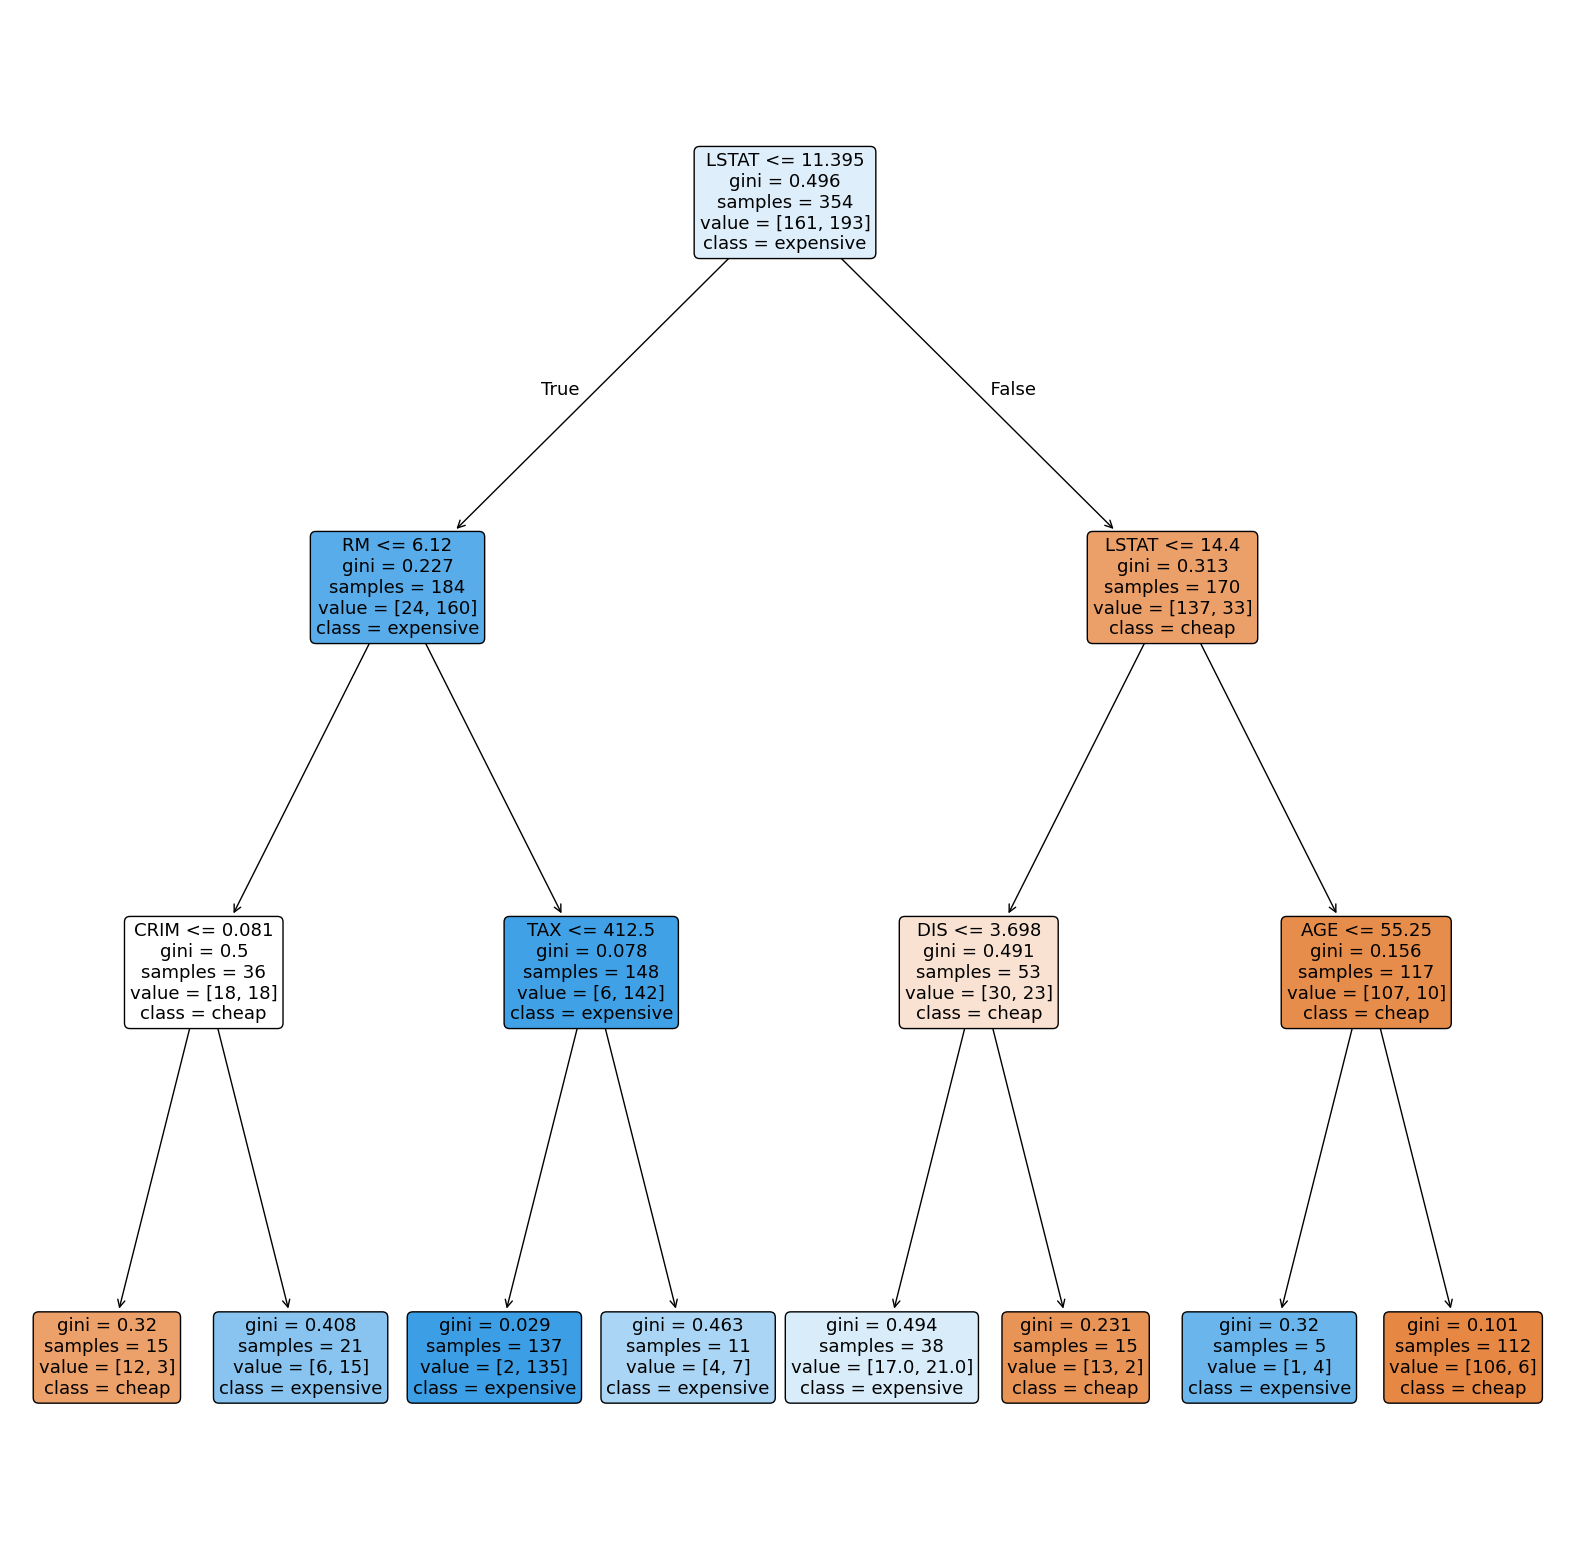

In [34]:
#plot the decision tree
plt.figure(figsize=(20, 20))
tree.plot_tree(decision_tree,
               feature_names=X_train.columns,
               class_names=['cheap', 'expensive'],
               filled=True,
               rounded=True)
plt.show()

The Random forest model is an ensemble of different decision trees. The criterion for evaluating the decion trees nodes is the gini index

In [35]:
#Apply random forest model
random_forest = RandomForestClassifier(n_estimators=300, criterion='gini', max_depth=None, random_state=42)
random_forest.fit(X_train, y_train)
#make predictions
y_pred = random_forest.predict(X_test)

Random forest can be used to find ot the important features in the data. According to random forest age is most important criterion to predict the income.

In [36]:
# Get feature importances from the model
feature_importances = random_forest.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
# Sort feature importances
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df

,Feature,Importance
12,LSTAT,0.248067
5,RM,0.155178
10,PTRATIO,0.114951
6,AGE,0.089202
9,TAX,0.071640
4,NOX,0.069875
0,CRIM,0.061299
7,DIS,0.058565
2,INDUS,0.051967
11,B,0.042858


Plot the important features

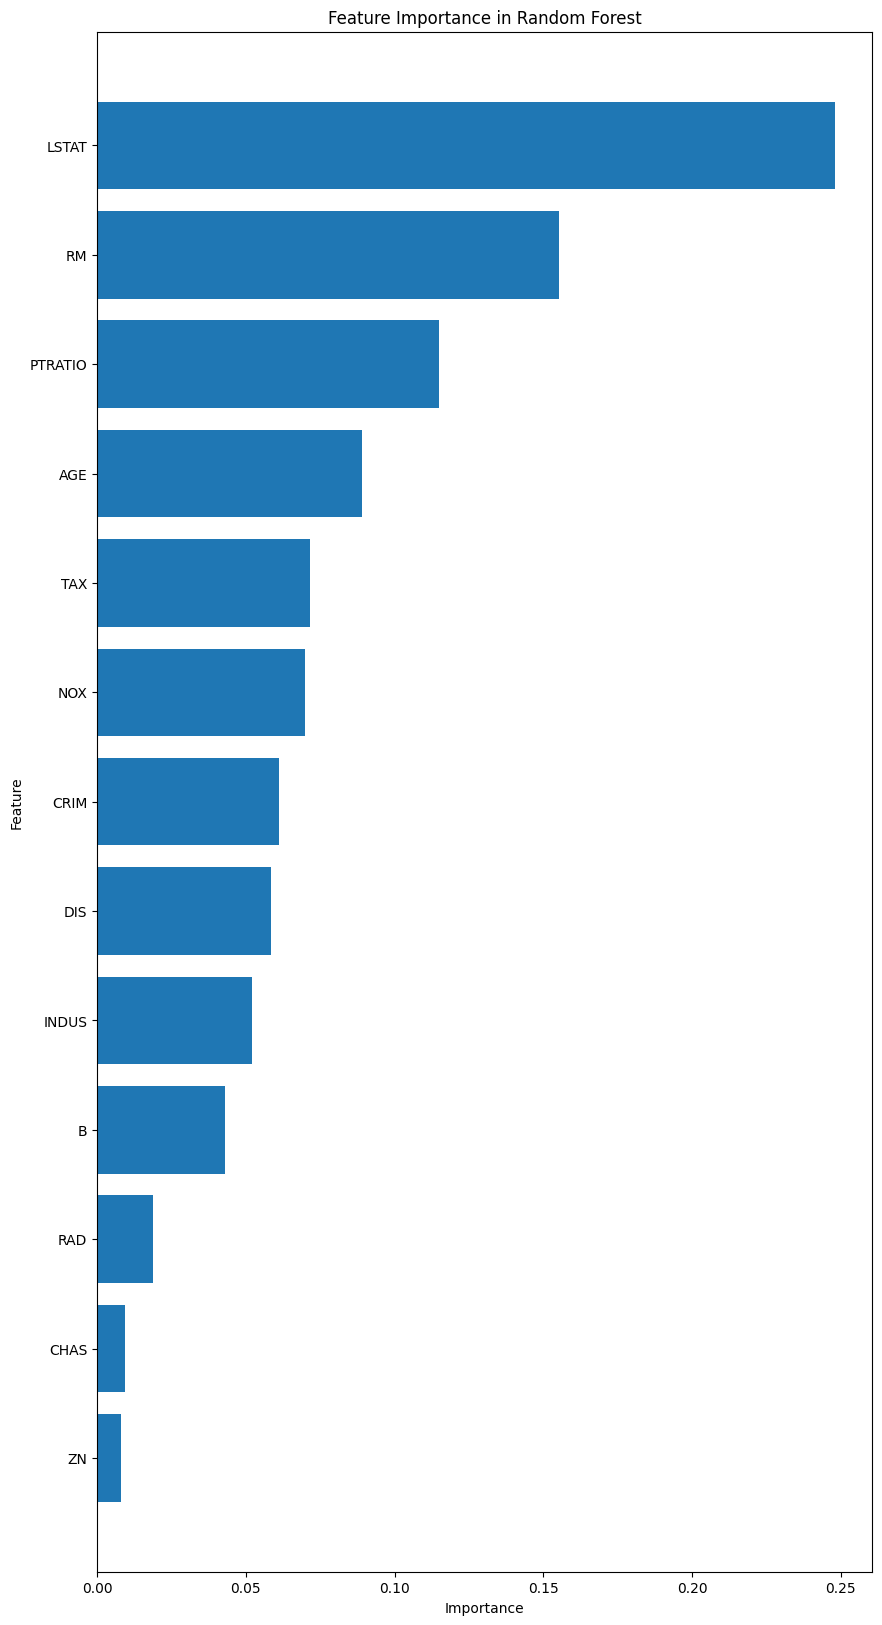

In [37]:
plt.figure(figsize=(10, 20))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest')
plt.show()

Evaluate the model using the accuracy and other metrics

In [38]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display a classification report for precision, recall, and F1-score
print("Classification Report:\n", classification_report(y_test, y_pred))

# Display a confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.86
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.83      0.88        90
           1       0.79      0.90      0.84        62

    accuracy                           0.86       152
   macro avg       0.86      0.87      0.86       152
weighted avg       0.87      0.86      0.86       152

Confusion Matrix:
 [[75 15]
 [ 6 56]]


A **Gradient Boosting Classifier** is a machine learning technique used for classification tasks . It builds a strong model by combining many weak models, typically decision trees.



In [39]:
# Initialize the GradientBoostingClassifier
gbm = GradientBoostingClassifier(
    n_estimators=100,    # Number of boosting stages (trees)
    learning_rate=0.05,   # Step size for updating weights (lower values make learning slower)
    max_depth=5,         # Maximum depth of individual trees
    random_state=42
)

# Fit the model on the training data
gbm.fit(X_train, y_train)
# Predict on the testing set
y_pred = gbm.predict(X_test)

In [40]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display a classification report for precision, recall, and F1-score
print("Classification Report:\n", classification_report(y_test, y_pred))

# Display a confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.86
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.81      0.87        90
           1       0.77      0.92      0.84        62

    accuracy                           0.86       152
   macro avg       0.85      0.87      0.85       152
weighted avg       0.87      0.86      0.86       152

Confusion Matrix:
 [[73 17]
 [ 5 57]]


SUPERVISED LEARNING WITH KNN:

We first encode the data and scale it as we first need to look at the priniple componants and then apply the componants to the KNN model.

We can now split the data into training and test sets according to the important components and apply the data to the KNN model and test the model and make predictions.

K-Nearest Neighbors (KNN) is a classification algorithm that predicts the category of a new data point by looking at the categories of the K closest points (neighbors) in the dataset. It assigns the most common category among these neighbors to the new point.

In [41]:

#set k values initially to 5
k = 5
#apply define model
knn_model = KNeighborsClassifier(n_neighbors=k)
#apply to the trainig data
knn_model.fit(X_train, y_train)
#make predictions using the test data
y_pred = knn_model.predict(X_test)


Evaluate the model

In [42]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.76
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.67      0.77        90
           1       0.65      0.90      0.76        62

    accuracy                           0.76       152
   macro avg       0.78      0.78      0.76       152
weighted avg       0.80      0.76      0.76       152

Confusion Matrix:
 [[60 30]
 [ 6 56]]


**CONCLUSION**:
<ol>
Logistic regression - 0.82


Decision tree       - 0.82


Random Forest       - 0.86


Gradient Boost      - 0.86


KNN                 - 0.76


</ol>

We can see that Gradient boosting and Random Forest classifiers are the best model for obvious reasons that it build models on errors to reduce the errors. Random forest is also a good model as it is an ensemble technique which is built using multiple decision trees and best trees are chose using the ranking of eah tree.

Decision trees ad logistic regression are always some easy classification models to begin with as they are simple to understand. KNN is a supervised learning algorithm that works based on K nearest neighbors, and it is a lazy algorithm.